<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_221125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap 3. 케라스 (Keras)**

---




## **1. 딥러닝 준비**

### **1.1 주요 용어**

> 하이퍼파라미터 (hyper-parameter)

  - `하이퍼파라미터`
    - 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값
    - 학습 속도, 반복 훈련 횟수 등

  - 하이퍼 파라미터 튜닝
    - 하이퍼파라미터의 값을 조절하는 행위

> 과소적합 vs. 과대적합 (underfitting vs. overfitting)

  - `과소적합` (underfitting)
    - 모델이 `충분히 학습되지 않은` 경우

  - `과대적합` (overfitting)
    - 학습 데이터를 `지나치게 반복 학습하여 과하게 적합`된 상태
    - 이 경우 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능은 좋지만, 정작 예측 데이터에 대한 예측 오차가 발생할 확률이 커진다.

  - 해결 방법
    1. 훈련 데이터와 예측 데이터의 분포가 동일하도록 구성한다.
    2. 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소한다.
    3. 훈련 데이터의 일부를 검증 데이터로 사용해 검증 성능이 가장 좋은 구간을 모델의 가장 이상적인 학습된 지점이라 판단하여 최종 모델을 결정한다.

> 에포크 (epoch)

  - 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는 과정이다.
  - 에포크 (epoch)
    - 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

> 손실함수 (loss function)

  - 손실함수
    - 예측 값과 정답 값의 차이 또는 오차

  - 지도 학습의 `분류`
    - `이진 분류` (binary classification) : `binary_crossentropy` 손실함수를 사용, 출력층의 `활성화 함수`는 `sigmoid`
    - `다중 분류` (multi-class classification)
      1. 정답 클래스가 `원핫 벡터`인 경우
        - `categorical_crossentropy` 손실함수를 사용
      2. 정답 클래스가 `원핫 벡터가 아닌` 경우
        - `sparse_categorical_crossentropy` 손실함수를 사용
      - 두 경우 모두 출력층의 `활성함수`로 `softmax`를 사용

  - 지도 학습의 `회귀`
    - MSE, MAE, Huber 등


In [3]:
# 예시
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

> 경사하강법 (gradient descent)

  - 경사하강법
    - 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

  - 넘파이를 활용한 경사하강법 구현
    1. 손실함수 혹은 목적 함수 정의

    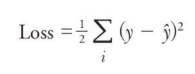
    2. 단순선형회귀 식에서 w, b를 구함
$$ y = wx + b$$

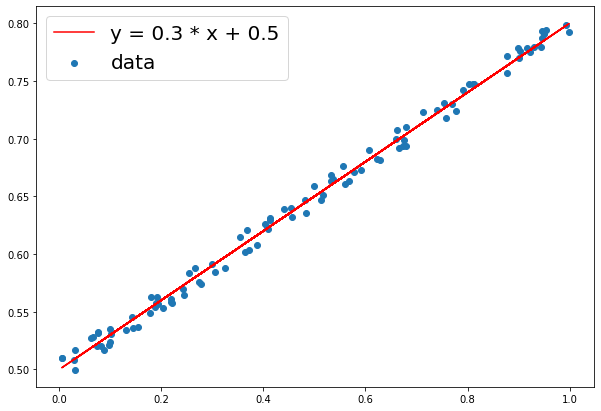

w: 0.3, b: 0.5


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise
  plt.figure(figsize = (10, 7))
  plt.plot(x, y, color = 'r', label = f'y = {w} * x + {b}')
  plt.scatter(x, yy, label = 'data')
  plt.legend(fontsize = 20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x, y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.01)

  - 위의 그림을 통해 실제 생성된 y 데이터는 약간의 노이즈를 가짐을 알 수 있다.
  - 이제 w, b에 대한 그래디언트를 구하는 부분을 구현해보자.
    1. w를 업데이트하는 수식
  
  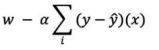
    2. b를 업데이트하는 최종 수식

  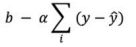

  - 그래디언트 w, b를 업데이트하는 수식을 구했으니, 넘파이로 최적하는 과정을 구현해 보자.

In [5]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w, b를 초기화
w = np.random.uniform(low = 0.0, high = 1.0)
b = np.random.uniform(low = 0.0, high = 1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss function 정의
  error = 0.5 * ((y_hat - y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print('{0:2} w = {1:.5f}, b = {2:.5f}, error = {3:.5f}'.format(epoch, w, b, error))

print('----' * 15)
print('{0:2} w = {1:.1f}, b = {2:.1f}, error = {3:.5f}'.format(epoch, w, b, error))

 0 w = 0.13264, b = 0.44812, error = 6.23838
 5 w = 0.20563, b = 0.54622, error = 0.04669
10 w = 0.22201, b = 0.53914, error = 0.03283
15 w = 0.23529, b = 0.53250, error = 0.02349
20 w = 0.24637, b = 0.52696, error = 0.01699
25 w = 0.25561, b = 0.52233, error = 0.01247
30 w = 0.26331, b = 0.51848, error = 0.00932
35 w = 0.26974, b = 0.51526, error = 0.00714
40 w = 0.27510, b = 0.51258, error = 0.00562
------------------------------------------------------------
43 w = 0.3, b = 0.5, error = 0.00494


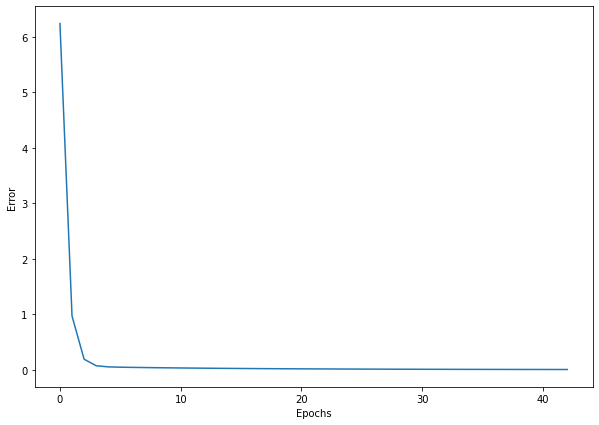

In [6]:
plt.figure(figsize = (10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### **1.2 딥러닝 프로세스**

  - 딥러닝 모델 구축 및 훈련 프로세스
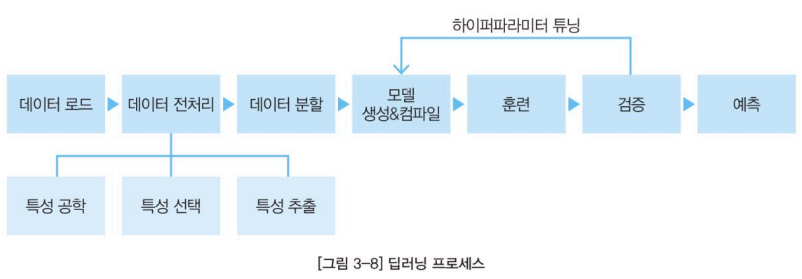

> 데이터 전처리

  - 데이터를 모델에 주입하기 전, 데이터를 가공하는 단계
  - 배열의 차원을 변경하거나 스케일을 조정

> 모델 생성

  - 모델의 구조를 정의하고 생성하는 단계
  - 모델 생성의 3가지 방법
    1. 순차적인 구조의 모델 : Sequential API로 구현
    2. 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델 : Functional API 또는 Model Subclassing 방법으로 구현

> 모델 컴파일

  - 생성된 모델 훈련에 사용할 `손실함수`(loss), `옵티마이저`(optimizer), `평가지표`(metrics) 등을 정의
  - 모델 인스턴스에 `compile() 메소드`를 적용하고, 앞에서 열거한 `여러 가지 속성 값을 설정`

> 모델 훈련

  - 모델을 훈련하는 단계
  - fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달
  - 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 지정

> 모델 검증

  - 훈련이 완료된 모델을 검증하는 단계
  - 모델 훈련에 사용하지 않은 검증 데이터셋을 모델에 입력하고, 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다.
  - 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이루어진다.

> 모델 예측

  - 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고, 그 결과를 반환한다.

---

## **2. 단순 신경망 훈련**

### **2.1 선형회귀**

  - 회귀 분석
    - 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
    - 단순선형회귀 모형은 하나의 X가 Y에 미치는 영향을 추정하며, 1차 함수 관계로 나타낼 수 있다.

  - 이번에는 텐서플로 케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝을 학습한다.
  - 모델의 가중치 w와 절편 b를 업데이트하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성해 나간다.

### **2.2 뉴런 (Neuron)**

  - 뉴런
    - 인공 신경망 모델을 구성하는 하나의 신경

  - 신경망
    - 여러 개의 레이어를 가지며, 1개의 레이어는 1개 이상의 뉴런으로 구성

  - 뉴런의 내부에는 가중치가 존재하고, 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트된다.
  
  - 역전파 알고리즘
    - 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법을 의미
    - 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그레디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장

### **2.3 Dense 레이어**

  - Dense 레이어
    - 심층 신경망 모델을 구성하는 가장 기본 레이어
    - 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있어, 완전 연결층(Fully Connected Layer)이라고 부른다.
  
  - Dense 레이어를 구성하는 노드(뉴런)개수와 활성화 함수를 지정할 수 있다.

  - 텐서플로의 layer 모듈에 있는 Dense 레이어로 쉽게 구현할 수 있다.
    - 노드의 개수를 Dense 레이어의 첫 번째 위치 인자로 지정한다.
    - Dense 레이어의 activation 매개변수에 활성화 함수를 지정하여 적용할 수 있다.

In [7]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation = 'relu')

### **2.4 데이터셋 만들기**

  - 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해 x, y 데이터를 생성한다.
  - 넘파이의 arange() 메소드를 활용하여 5개의 순차적인 x 데이터를 생성하고, 임의의 1차 함수인 y = 3x + 2 관계식에 대입하여 y 데이터 5개를 생성한다.

In [8]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


  - 생성한 데이터를 matplotlib 시각화 라이브러리를 활용해 그래프를 출력한다.

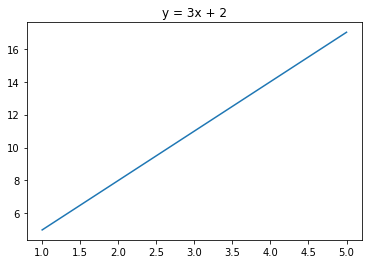

In [9]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

### **2.5 Sequential API**

  - Sequential API 방식
    - 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
    - 따라서, 입력 레이어부터 출력 레이어까지 순서를 갖는다.
    - 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행한다.

  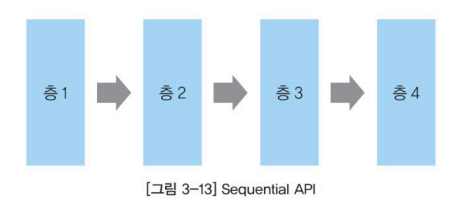
    - 이처럼 직관적으로 구조를 이해할 수 있어 케라스 모델을 생성하고 훈련하는 가장 간단한 방법이라 할 수 있다.
    - 다만, 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점이 있는데, 이러한 경우에는 Functional API를 사용해야 한다.

> 모델 구조

  - Sequential API를 사용해 모델을 생성하는 2가지 방법

1. 리스터형 정의로 `Sequential 클래스` 함수에 파이썬 `리스트 형태로 여러 개의 층을 입력`

In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

2. add 함수로 레이어 추가로 `Sequential 클래스 객체를 먼저 만든` 뒤, 생성된 `모델 인스턴스에 층을 추가`하는 방식

In [10]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

> 입력 데이터 형태

  - Sequential API를 사용해 모델을 구성할 때, 반드시 `첫 번째 층`은 `input_shape 매개변수를 지정`해야 한다.
  - `input_shape` 매개변수
    - 주입할 `데이터셋의 shape`을 튜플 혹은 리스트로 지정

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape = [4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

> 단순선형회귀 모델 정의

  - 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용한다.
  - 1차 함수식에서 입력 데이터는 x 값을 나타내는 입력 변수 1개만 존재하므로, input_shape = [1]로 지정한다.
  - 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력 값을 가지므로, 출력 값은 y에 대한 모델의 예측 값이다.

In [12]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

### **2.6 모델 요약**

  - Sequential API로 모델을 만들었다면, model.summary()로 모델의 요약을 확인할 수 있다.

In [13]:
# 모델 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


  - Total params : 모델 내부에 존재하는 모든 파라미터의 합계
  - Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
  - Non-trainable params : 훈련 시 업데이트하지 않을 파라미터의 총 개수

### **2.7 컴파일**

  - 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의한다.
  - 옵티마이저, 손실함수, 평가지표는 클래스 인스턴스, 함수 혹은 사전 정의된 문자열을 활용해 지정할 수 있다.

In [14]:
# 긴 문자열 지정
model.compile(optimizer = 'sgd', loss = 'mean_squared_error',
              metrics = ['mean_squared_error', 'mean_absolute_error'])

In [15]:
# 짧은 문자열 지정
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse', 'mae'])

In [16]:
# 클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.005),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()
              ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  - 앞에서 정의한 단순선형회귀 모델을 훈련시키기 위해서 옵티마이저는 확률적 경사하강법 알고리즘인 'sgd', 손실함수로는 평균제곱오차인 'mse', 평가지표는 평균절대오차인 'mae'를 지정한다.

In [17]:
# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

### **2.8 훈련**

  - 생성한 모델 인스턴스에 fit() 메소드를 적용하면, 데이터를 입력하여 모델을 훈련할 수 있다.
  - 모델을 훈련한다는 것은 가중치 텐서를 업데이트하는 과정이다.

  - fit() 메소드를 활용해 epoch를 5로 설정하여 5회 반복 훈련한 뒤 결과를 확인해 보자.

In [18]:
# 훈련
model.fit(x, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 523ms/step - loss: 45.3871 - mae: 6.4085
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 26.6129 - mae: 4.9504
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 15.6711 - mae: 3.8372
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.2937 - mae: 2.9872
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 5.5762 - mae: 2.3381


  - 매 epoch 당 loss 값이 점점 줄어드는 것으로 보아 모델이 잘 학습되고 있는 것을 알 수 있다.
  - 그러나 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었다고 볼 수 있다.
  - 따라서 epoch를 늘려서 추가 학습을 진행하면 손실을 더욱 낮출 수 있을 것으로 보인다. 즉, 모델은 현재 과소적합 상태이다. 

  - 이번에는 epoch에 1200을 지정하여 충분히 훈련할 수 있도록 한다.

In [19]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

# 훈련
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 314ms/step - loss: 151.1267 - mae: 11.4566
Epoch 2/1200
1/1 [==============================] - 0s 10ms/step - loss: 88.1510 - mae: 8.7870
Epoch 3/1200
1/1 [==============================] - 0s 9ms/step - loss: 51.4513 - mae: 6.7490
Epoch 4/1200
1/1 [==============================] - 0s 6ms/step - loss: 30.0640 - mae: 5.1930
Epoch 5/1200
1/1 [==============================] - 0s 8ms/step - loss: 17.6000 - mae: 4.0051
Epoch 6/1200
1/1 [==============================] - 0s 7ms/step - loss: 10.3361 - mae: 3.0981
Epoch 7/1200
1/1 [==============================] - 0s 7ms/step - loss: 6.1025 - mae: 2.4056
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.6348 - mae: 1.8768
Epoch 9/1200
1/1 [==============================] - 0s 7ms/step - loss: 2.1962 - mae: 1.4730
Epoch 10/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.3574 - mae: 1.1647
Epoch 11/1200
1/1 [==============================] - 0s 7m

  - 충분한 epoch 동안 훈련한 후 mse, mae 모두 개선되었음을 확인할 수 있다.
  - 훈련에 대한 결과가 저장된 history 변수를 사용해 epoch별 훈련 손실 및 평가지표를 시각화할 수 있다.

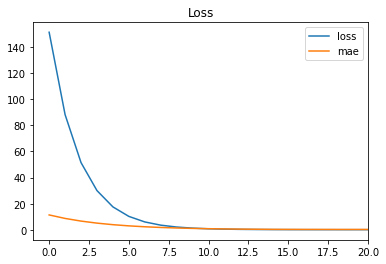

In [20]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['mae'], label = 'mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

  - 첫 10 epoch까지 손실이 급격히 감소하다가, 10 epoch를 넘어가면 감소 폭이 둔화되면서 조금씩 감소하는 것을 확인할 수 있다.
  - 즉, 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴을 보이고 있다.

### **2.9 검증**

  - 모델 인스턴스의 evaluate() 메소드로 모델의 성능을 검증할 수 있다.
  - 일반적으로 검증 데이터셋을 입력하여 검증한다.

In [21]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 277ms/step - loss: 5.8844e-05 - mae: 0.0066


[5.8844096201937646e-05, 0.006584072019904852]

  - 검증 단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용해 손실과 평가지표를 계산하므로, 모델 훈련 단계에서 1200번 epoch를 종료한 상태에서 출력된 값과 동일하다.

### **2.10 예측**

  - 훈련이 완료된 모델 인스턴스의 predict() 메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있다.

In [22]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 85ms/step


array([[32.031822]], dtype=float32)

---

## **3. 심층 신경망으로 이미지 분류**

### **3.1 케라스 내장 데이터셋 로드**

  - 케라스는 모델 훈련에 필요한 샘플 데이터셋을 제공한다.
  - 데이터셋은 `tensorflow.keras.datasets` 서브패키지에 위치한다.
  - 케라스의 datasets 패키지에 있는 데이터를 불러오기 위해 `load_data()` 메소드를 사용한다.

In [23]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

  - mnist 데이터의 훈련 데이터셋과 검증 데이터셋을 튜플 형태로 정의한다.

In [24]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [25]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


  - `훈련 셋`에는 `60000개`의 데이터가, `검증 셋`에는 `10000개`의 데이터가 저장되어 있다.
  - `입력 데이터`에 해당하는 `x_train`, `x_test`에는 mnist 손글씨 이미지 데이터가 저장되고, 배열의 shape은 (데이터셋 크기, 28, 28)이다.
    - `x_train` : `28 x 28 픽셀` 크기의 정사각형 이미지 `60000개` 저장
    - `x_test` : `28 x 28 픽셀` 크기의 정사각형 이미지 `10000개` 저장

  - 각 입력 데이터에 대응되는 `출력 데이터` 또한 60000, 10000개가 `1차원 벡터 형태`로 정리되어 있다.

  - matplotlib 시각화 라이브러리로 이미지를 시각화해 보자.

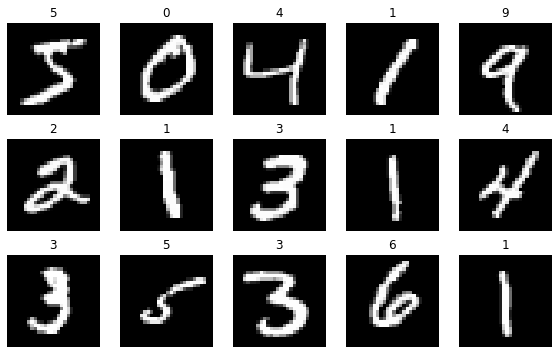

In [26]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

  - mnist 데이터셋은 사람의 필기체로 쓰인 0~9까지의 숫자들로 이루어진 데이터셋이다.
  - 0~9까지 총 10개의 정답 레이블로 구성되어 있다. 

### **3.2 데이터 전처리**

  - 이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절한다.
  - x_train은 넘파이 배열이며, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭된다.

In [27]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

  - 데이터가 0-255 범위의 값으로 이루어져 있으므로, 데이터의 범위를 0-1 사이의 값을 갖도록 정규화하기 위해서는 최대값인 255로 나눠준다.

In [28]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [29]:
# 검증 셋에도 동일한 정규화 적용
x_test = x_test / x_test.max()

  - 정규화 변환이 완료된 후 데이터를 출력해보면 0-1 사이의 값이 출력되는 것을 확인할 수 있다.

In [30]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### **3.3 Flatten 레이어**

  - 정규화를 하더라도 개별 데이터 값의 범위만 축소될 뿐, 원본 배열의 형태는 그대로 유지된다.
  - 샘플 이미지 형태는 (28, 28)로 이루어진 2차원 입력인데, `2차원 입력`인 `Dense 레이어`에 `입력값으로 넣을 수 없다.`
  - `Dense 레이어`에는 입력값으로 `반드시 1차원 배열`이 들어가야 하므로, `이미지 데이터를 1차원으로 전처리`하여 주입해야 한다.

In [31]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D로 shape 변경 후: (60000, 784)


  - 또는 `Flatten` 레이어를 사용해 `다차원 데이터를 1차원으로` 펼쳐줄 수도 있다.

In [32]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### **3.4 활성화 함수**

  - 활성화 함수(Activation Function)
    - 입력을 비선형 출력으로 변환해주는 함수
    - 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법

  - 자주 사용되는 활성화 함수
    1. 시그모이드
  
  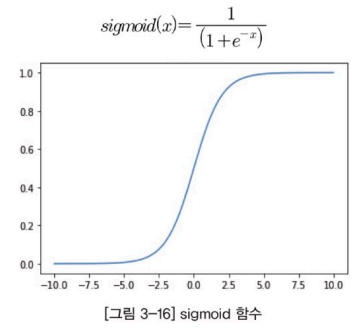

    2. 하이퍼볼릭 탄젠트
  
  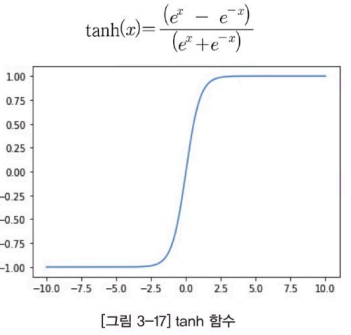

    3. ReLU
  
  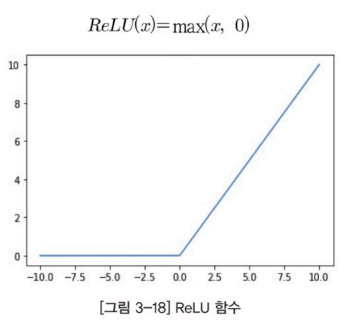

In [33]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation = 'relu')

  - 별도의 층으로 적용할 수도 있다.
  - 별도의 층으로 적용하는 경우는 Dense 레이어 다음에 배치 정규화를 적용한 후, 활성화 함수를 적용하고자 할 때 많이 사용된다.

In [34]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### **3.5 입력과 출력**

  - 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적이다.
    - 여기서는 이미지의 세로, 가로 형태를 나타내는 input_shape = (28, 28)를 input_shape로 지정한다.

  - 가장 마지막 레이어는 출력층이다.
    - 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 한다.
    - mnist는 0-9까지 총 10개의 클래스로 이루어져 있으므로, 마지막 출력층의 노드 개수는 10개가 되어야 한다. 

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    # 노드 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation = 'softmax')
])

  - `다중 분류` 문제에서는 `softmax` 활성화 함수를 사용해야 한다.
  - 반면, `이진 분류` 모델의 경우 `sigmoid` 활성화 함수를 적용한다.

In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = 'softmax')

### **3.6 손실함수**

  - 분류 모델의 손실함수 
    1. 출력층의 `노드 개수가 1`인 경우
      - 활성화 함수 : '`sigmoid`'로 지정
      - 손실함수 : '`binary_crossentropy`'로 지정

    2. 출력층의 `노드 개수가 2개 이상`이고, `출력 데이터가 원핫 벡터`인 경우
      - 활성화 함수 : '`softmax`'로 지정
      - 손실함수 : '`categorical_crossentropy`'로 지정

    3. 출력층의 `노드 개수가 2개 이상`이고, `출력 데이터가 원핫 벡터가 아닌 경우`
      - 활성화 함수 : '`softmax`'로 지정
      - 손실함수 : '`sparse_categorical_crossentropy`'로 지정

In [36]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss = 'binary_crossentropy')

In [37]:
# 다중 분류(출력 노드 개수 >= 2, softmax인 경우)
# y가 원핫 벡터인 경우
model.compile(loss = 'categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss = 'sparse_categorical_crossentropy')

  - mnist 데이터의 경우, 출력 데이터가 원핫 벡터가 아닌 다중 분류 문제이므로 손실함수로 'sparse_categorical_crossentroopy'를 지정하면 된다.

### **3.7 옵티마이저**

  - 옵티마이저
    - 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

  - 옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다.
    - 문자열 : 클래스 이름을 소문자로 지정
    - 클래스 인스턴스 : 학습률과 같은 하이퍼파라미터를 직접 설정 

In [38]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam)

# 문자열로 지정
model.compile(optimizer = 'adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### **3.8 평가지표**

  - 분류 모델에 대한 평가지표
    - 정확도를 나타내는 'accuracy', 'auc', 'precision', 'recall' 등

  - 평가지표 역시 옵티마이저와 마찬가지로 클래스 인스턴스 또는 문자열로 지정이 가능하다.

In [39]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [40]:
# 문자열로 지정
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### **3.9 훈련**

  - 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력한다.

In [41]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2267 - accuracy: 0.9322 - val_loss: 0.1157 - val_accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0956 - accuracy: 0.9703 - val_loss: 0.0938 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0685 - accuracy: 0.9781 - val_loss: 0.0756 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0849 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0685 - val_accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.1296 - val_accuracy: 0.9632
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0815 - val_accur

### **3.10 평가**

  - 10회의 epoch가 끝나고 훈련이 종료된 뒤, `evaluate()` 메소드로 `모델 성능을 검증`하고 `평가 결과를 확인`한다.

In [42]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0849 - accuracy: 0.9792
검증 셋 정확도:  0.979200005531311


### **3.11 예측**

  - 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있다.
  - predict() 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환한다.

In [45]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


  - predictions 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장한다.

In [46]:
# 예측 결과 출력
predictions[0]

array([1.6900553e-10, 5.6207541e-09, 2.2634226e-09, 3.3170073e-09,
       1.8751971e-10, 1.4840815e-07, 4.9122680e-14, 9.9999946e-01,
       2.1499231e-07, 1.7541724e-07], dtype=float32)

  - softmax 활성화 함수를 거친 `10개의 출력 값`은 순차적으로 `0-9까지의 10개의 개별 클래스에 대한 분류 확률값`을 나타낸다.
  - 이 중 `가장 높은 확률값을 가진 클래스`가 `최종 예측된 클래스`이다.
  - 넘파이의 `argmax`를 활용해 가장 높은 확률값을 가지는 클래스 결과를 확인해 보자.

In [47]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis = 1))

7
[7 2 1 0 4 1 4 9 5 9]


  - matplotlib 시각화 라이브러리의 imshow() 메소드를 활용하여 15개 예측한 결과에 대한 시각화 코드는 다음과 같다.

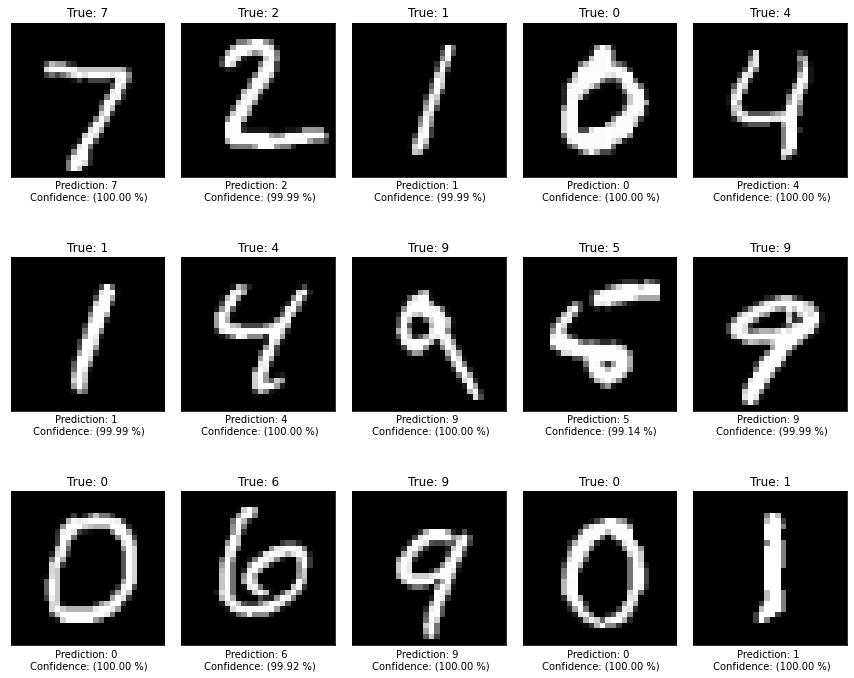

In [50]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred} \n Confidence: ({confidence :.2f} %)')

plt.tight_layout()
plt.show()

---

## **4. 모델 세부 설정** 

  - 앞에서 다룬 mnist 데이터셋을 데이터 정규화까지 처리하여 입력 데이터를 준비한다.

In [51]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


### **4.1 초기값 설정**

  - Dense 레이어는 `기본 초기화` 방법으로 `Glorot Unifor`m 초기화 방법이 설정되어 있다.
  - 이를 `변경하기 위해`서는 `kernel_initializer` 매개변수에 설정하면 된다.
    - 옵티마이저, 손실함수와 마찬가지로 `문자열로 지정`하는 방법과 `클래스 인스턴스로 지정`하는 방법이 있다.

In [52]:
dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [53]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal', activation = 'relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer = he_normal, activation = 'relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


### **4.2 규제 (Regularization)**

  - 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다.
  - 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않으므로, 이를 적용하기 위해서는 별도로 설정해주어야 한다.

In [54]:
# 기본값
dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()

{'name': 'dense_21',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [55]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer = 'l1', activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha = 0.1 변경
regularizer = tf.keras.regularizers.l1(l1 = 0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer = regularizer, activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### **4.3 드롭아웃 (Dropout)**

  - 딥러닝 모델의 가장 큰 난제가 바로 과대적합 문제이다.
  - 딥러닝 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있어, 새로운 데이터에 대해서는 좋지 않은 예측력을 보일 때가 많다.
  - 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이며, 실무적으로 상당히 좋은 효과를 보이는 것으로 알려져 있다.
  - `드롭아웃`
    - 노드의 `일부 신호를 임의로 삭제`하여 모델이 쉽게 `과대적합 되는 것을 방지`하는 방법

In [56]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### **4.4 배치 정규화 (Batch Normalization)**

  - 배치 정규화
    - 각 층에서 활성화 함수를 통과하기 전, 미니 배치의 스케일을 정규화
    - 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에, 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있다.

  - Dense 레이어에 ReLU 활성화 함수를 추가한 모델을 model_a로 지정해 생성하고, 배치 정규화를 적용 후 ReLU 활성화 함수를 추가한 모델을 model_b로 지정하여 성능을 비교해보자. 

In [57]:
# Model A : Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_a.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Model B : Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_b.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

  - 두 방법으로 모델을 훈련한 결과, 배치 정규화만 추가하였는데도 손실은 이전 대비 더 안정적이고 빠르게 수렴하는 것을 확인할 수 있다.

### **4.5 활성화 함수**

In [60]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha = 0.2로 변경
tf.keras.layers.LeakyReLU(alpha = 0.2)

  - LeakyReLU는 모델에 다음과 같이 적용해볼 수 있다.

In [61]:
# Model C : Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 모델 요약
model_c.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

  - 앞에서 생성한 2개의 모델과 LeakyReLU 활성화 함수로 변경한 모델까지 더해서 총 3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 후, 수렴 속도를 확인한다. 
    - model_a : Dense 레이어 + ReLU 활성화 함수
    - model_b : Dense 레이어 + 배치 정규화
    - model_c : Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

In [62]:
model_a.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_b.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_c.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Model A : Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs = 10)

# Model B : Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs = 10)

# Model C : Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3079 - accuracy: 0.9104 - val_loss: 0.1514 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1355 - accuracy: 0.9603 - val_loss: 0.1217 - val_accuracy: 0.9619
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0978 - accuracy: 0.9706 - val_loss: 0.1137 - val_accuracy: 0.9656
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0778 - accuracy: 0.9755 - val_loss: 0.0956 - val_accuracy: 0.9697
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.0947 - val_accuracy: 0.9708
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 0.0881 - val_accuracy: 0.9724
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0463 - accuracy: 0.9852 - val_loss: 0.0845 - val_accura

  - 결과를 시각화하면 epoch별 검증 손실의 감소 추이를 확인할 수 있다.

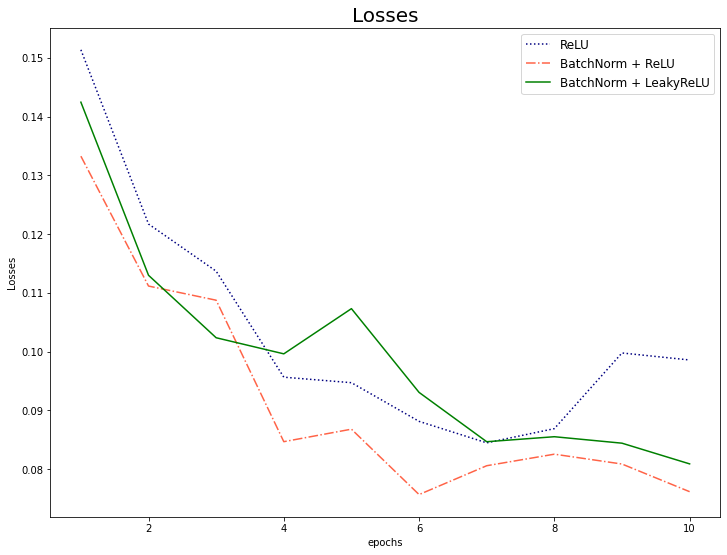

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color = 'navy', linestyle = ':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color = 'tomato', linestyle = '-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color = 'green', linestyle = '-')

plt.title('Losses', fontsize = 20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize = 12)
plt.show()

  - mnist 데이터셋은 모델별 차이가 크지는 않다. 
  - 하지만 더 복잡한 데이터셋을 다룬다면 배치 정규화와 다른 활성화 함수를 적용해 보면서 모델 훈련 추이를 관찰해 볼 필요가 있다.